# DATA DESCRIPTION

The data can be found at https://ssh.datastations.nl/dataverse/root. For data to become available, registration to the website
is required, while access to the datasets must be requested by the Data station of Social Sciences and Humanities for free.
Data were collected for years 2018 - 2022. 
The dataset is a trip diary survey where people within Netherlands record their trips and answer demographic questions. The survey is called
ODIN and is conducted by the Central Bureau of Statistics in Netherlands annualy. 
Features within the dataset are decribed in Dutch so it was required to translate them using Google and following the Codebook Guideline
also available at the same link as above.
The original datasets for each year, as downloaded from the website, contain about 150000-200000 trips/rows and about 100 columns.
From these datasets, trip related features were selected such as distance and duration of the trip and some demographic features such as 
household size and number of vehicles in the house. After the features were extracted for each years, the data were merged and the resulting dataset
can be seen below

In [262]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from itertools import cycle
import warnings
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.utils import shuffle
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [169]:
zip_file_path = 'final.zip'
csv_file_inside_zip = 'Netherlands_data_prototype.csv'

In [170]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [171]:
warnings.filterwarnings("ignore")

In [172]:
df

,HHPers,Geslacht,Leeftijd,OPRijbewijsAu,HHAuto,HHEFiets,Jaar,Maand,Weekdag,Toer,KMotiefV,AfstR,RReisduur,RVertUur,KRvm
0,1,1,42,1,1,0,2018,1,7,0,4,60,15,10,1
1,1,1,42,1,1,0,2018,1,7,0,4,60,10,11,1
2,1,1,42,1,1,0,2018,1,7,0,6,10,5,15,5
3,1,1,42,1,1,0,2018,1,7,0,6,10,5,18,5
4,2,1,42,1,1,0,2018,1,6,0,4,30,10,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,2,49,1,1,0,2022,12,5,0,5,110,35,15,1
817122,3,2,49,1,1,0,2022,12,5,0,4,11,7,16,6
817123,3,2,49,1,1,0,2022,12,5,0,4,6,5,17,6
817124,3,2,49,1,1,0,2022,12,5,0,7,63,15,18,1


In [173]:
print(df.columns)

Index(['HHPers', 'Geslacht', 'Leeftijd', 'OPRijbewijsAu', 'HHAuto', 'HHEFiets',
       'Jaar', 'Maand', 'Weekdag', 'Toer', 'KMotiefV', 'AfstR', 'RReisduur',
       'RVertUur', 'KRvm'],
      dtype='object')


In [174]:
new_columns= {"HHPers": "People_in_house",  "Geslacht": "Gender", "Leeftijd": "Age",
               "OPRijbewijsAu": "Driver_license", "HHAuto": "Cars_in_house",
              "HHEFiets": "Electric_bike", "Jaar": "Year", "Maand": "Month", "Weekdag": "Weekday",
              "Toer": "Round_trip", "KMotiefV": "Motive",
              "AfstR": "Distance", "RReisduur": "Duration", 'RVertUur':'Hour', "KRvm": "Mode"}

In [175]:
df.rename(columns=new_columns, inplace=True)
df

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Electric_bike,Year,Month,Weekday,Round_trip,Motive,Distance,Duration,Hour,Mode
0,1,1,42,1,1,0,2018,1,7,0,4,60,15,10,1
1,1,1,42,1,1,0,2018,1,7,0,4,60,10,11,1
2,1,1,42,1,1,0,2018,1,7,0,6,10,5,15,5
3,1,1,42,1,1,0,2018,1,7,0,6,10,5,18,5
4,2,1,42,1,1,0,2018,1,6,0,4,30,10,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,2,49,1,1,0,2022,12,5,0,5,110,35,15,1
817122,3,2,49,1,1,0,2022,12,5,0,4,11,7,16,6
817123,3,2,49,1,1,0,2022,12,5,0,4,6,5,17,6
817124,3,2,49,1,1,0,2022,12,5,0,7,63,15,18,1


# Variables

1) People_in_house - How many members the household has - Numeric - Discrete - Integer
2) Gender - Male / Female - Categorical - Binary
3) Age - Age of the respondent in years - Numeric - Continuous - Integer
4) Drivel_License - If the respondent has car driving license - Categorical - Binary
5) Cars_in_house - How many vehicles the household has - Numeric - Discrete - integer
6) Electric_bike - If the respondent has access to an electric bike - Categorical - binary
7) Year - Year that the trip occured - Numeric - Integer
8) Month - Month that the trip occured - Categorical
9) Weekday - Day that the trip occured - Categorical
10) Round_trip - If the respondent made a round trip (Begin and finish the trip at the same location) - Categorical - Binary
11) Motive - The reason of the trip - Categorial - Nominal
12) DIstance - The distance (In hectometers) of the trip - Numeric - Continuous
13) Duration - The duration (In minutes) of the trip - Numeric - Continuous
14) Hour - Hour of departure
15) Mode - The mode of transportation for the trip - Categorical - Target variable

In [176]:
df.isnull().any()

People_in_house    False
Gender             False
Age                False
Driver_license     False
Cars_in_house      False
Electric_bike      False
Year               False
Month              False
Weekday            False
Round_trip         False
Motive             False
Distance           False
Duration           False
Hour               False
Mode               False
dtype: bool

In [177]:
drops = ['Year']
df = df.drop(drops, axis=1)
df

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Electric_bike,Month,Weekday,Round_trip,Motive,Distance,Duration,Hour,Mode
0,1,1,42,1,1,0,1,7,0,4,60,15,10,1
1,1,1,42,1,1,0,1,7,0,4,60,10,11,1
2,1,1,42,1,1,0,1,7,0,6,10,5,15,5
3,1,1,42,1,1,0,1,7,0,6,10,5,18,5
4,2,1,42,1,1,0,1,6,0,4,30,10,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,2,49,1,1,0,12,5,0,5,110,35,15,1
817122,3,2,49,1,1,0,12,5,0,4,11,7,16,6
817123,3,2,49,1,1,0,12,5,0,4,6,5,17,6
817124,3,2,49,1,1,0,12,5,0,7,63,15,18,1


In [178]:
df.duplicated().sum()

37380

In [179]:
df = df.drop_duplicates()
df.shape

(779746, 14)

In [180]:
df = df.drop_duplicates(subset=df.columns.difference(['Mode']))
df.shape

(779023, 14)

In [181]:
df

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Electric_bike,Month,Weekday,Round_trip,Motive,Distance,Duration,Hour,Mode
0,1,1,42,1,1,0,1,7,0,4,60,15,10,1
1,1,1,42,1,1,0,1,7,0,4,60,10,11,1
2,1,1,42,1,1,0,1,7,0,6,10,5,15,5
3,1,1,42,1,1,0,1,7,0,6,10,5,18,5
4,2,1,42,1,1,0,1,6,0,4,30,10,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,2,49,1,1,0,12,5,0,5,110,35,15,1
817122,3,2,49,1,1,0,12,5,0,4,11,7,16,6
817123,3,2,49,1,1,0,12,5,0,4,6,5,17,6
817124,3,2,49,1,1,0,12,5,0,7,63,15,18,1


# Encode variables to categorial so to perform Explanatory Data Analysis
We will use the codebook available at: https://ssh.datastations.nl/dataset.xhtml?persistentId=doi:10.17026/dans-zwz-fq8t

In [182]:
df['Gender'].value_counts()

Gender
2    403032
1    375991
Name: count, dtype: int64

In [183]:
df['Gender'] = df['Gender'].map({1:"Male", 2:"Female"})

In [184]:
df['Driver_license'].value_counts()

Driver_license
1    582251
0    196772
Name: count, dtype: int64

In [185]:
df['Driver_license'] = df['Driver_license'].map({0:"No", 1:"Yes"})

In [186]:
df['Electric_bike'].value_counts()

Electric_bike
0    550386
1    228637
Name: count, dtype: int64

In [187]:
df['Electric_bike'] = df['Electric_bike'].map({0:"No", 1:"Yes"})

In [188]:
df['Month'].value_counts()

Month
9     72735
11    70481
1     69656
10    69468
5     65439
3     65415
6     64552
8     62858
7     60739
12    60590
2     59201
4     57889
Name: count, dtype: int64

In [189]:
df['Month'] = df['Month'].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July",
                               8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})

In [190]:
df['Weekday'].value_counts()

Weekday
6    123362
5    117611
3    115076
4    114750
2    112199
7    111669
1     84356
Name: count, dtype: int64

In [191]:
df['Weekday'] = df['Weekday'].map({1:"Sunday", 2:"Monday", 3:"Tuesday", 4:"Wednesday", 5:"Thursday", 6:"Friday", 7:"Saturday"})

In [192]:
df['Round_trip'].value_counts()

Round_trip
0    680728
1     98295
Name: count, dtype: int64

In [193]:
df['Round_trip'] = df['Round_trip'].map({0:"No", 1:"Yes"})

In [194]:
df['Motive'].value_counts()

Motive
4    150582
7    141201
1    135240
9     82668
8     80965
6     79844
5     63806
3     25349
2     19368
Name: count, dtype: int64

In [195]:
df['Motive'] = df['Motive'].map({1:"Go to/return from work", 2:"Business related", 3:"Service/Personal care", 4:"Shopping/Grocery",
                                 5:"Education", 6:"Visits", 7:"Social and recreational", 8:"Tours/hiking", 9:"Other motives" })

In [196]:
df['Mode'].value_counts()

Mode
1    256777
5    223833
6    188410
2     81536
4     28467
Name: count, dtype: int64

1 represents car driver and 2 represents car passenger. We will group them into one class : car

In [197]:
df['Mode'] = df['Mode'].map({1:"car", 2:"car", 4:"public transport", 5:"bike", 6:"walk"})

In [198]:
df['Mode'].value_counts()

Mode
car                 338313
bike                223833
walk                188410
public transport     28467
Name: count, dtype: int64

In [199]:
df.shape

(779023, 14)

In [200]:
df

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Electric_bike,Month,Weekday,Round_trip,Motive,Distance,Duration,Hour,Mode
0,1,Male,42,Yes,1,No,January,Saturday,No,Shopping/Grocery,60,15,10,car
1,1,Male,42,Yes,1,No,January,Saturday,No,Shopping/Grocery,60,10,11,car
2,1,Male,42,Yes,1,No,January,Saturday,No,Visits,10,5,15,bike
3,1,Male,42,Yes,1,No,January,Saturday,No,Visits,10,5,18,bike
4,2,Male,42,Yes,1,No,January,Friday,No,Shopping/Grocery,30,10,9,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Female,49,Yes,1,No,December,Thursday,No,Education,110,35,15,car
817122,3,Female,49,Yes,1,No,December,Thursday,No,Shopping/Grocery,11,7,16,walk
817123,3,Female,49,Yes,1,No,December,Thursday,No,Shopping/Grocery,6,5,17,walk
817124,3,Female,49,Yes,1,No,December,Thursday,No,Social and recreational,63,15,18,car


# Data Cleaning

In [201]:
df.describe()

,People_in_house,Age,Cars_in_house,Distance,Duration,Hour
count,779023.000000,779023.000000,779023.000000,779023.000000,779023.000000,779023.000000
mean,2.853208,42.295510,1.380433,97.460097,24.080885,13.630607
std,1.387702,20.751677,1.001783,199.684761,31.755163,4.254558
min,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,1.000000,11.000000,10.000000,10.000000
50%,3.000000,42.000000,1.000000,30.000000,15.000000,14.000000
75%,4.000000,59.000000,2.000000,86.000000,30.000000,17.000000
max,10.000000,99.000000,10.000000,6600.000000,993.000000,33.000000


The distance column stores values that are measured in Hectometers. We need to convert those to Kilometers as they are more 
widely used and easier to understand. To convert Hectometers into Kms we need to devide the values with 10

In [202]:
df['Distance_in_kms'] = df['Distance'] / 10

We drop now the Distance column

In [203]:
df = df.drop("Distance", axis=1)

In [204]:
df = df[(df['Hour'] <= 23)]

In [205]:
df.describe()

,People_in_house,Age,Cars_in_house,Duration,Hour,Distance_in_kms
count,778674.000000,778674.000000,778674.000000,778674.000000,778674.000000,778674.000000
mean,2.853432,42.300683,1.380596,24.084777,13.625852,9.748366
std,1.387662,20.752925,1.001492,31.760794,4.249546,19.971982
min,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,1.000000,10.000000,10.000000,1.100000
50%,3.000000,42.000000,1.000000,15.000000,14.000000,3.000000
75%,4.000000,59.000000,2.000000,30.000000,17.000000,8.600000
max,10.000000,99.000000,10.000000,993.000000,23.000000,660.000000


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778674 entries, 0 to 817125
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   People_in_house  778674 non-null  int64  
 1   Gender           778674 non-null  object 
 2   Age              778674 non-null  int64  
 3   Driver_license   778674 non-null  object 
 4   Cars_in_house    778674 non-null  int64  
 5   Electric_bike    778674 non-null  object 
 6   Month            778674 non-null  object 
 7   Weekday          778674 non-null  object 
 8   Round_trip       778674 non-null  object 
 9   Motive           778674 non-null  object 
 10  Duration         778674 non-null  int64  
 11  Hour             778674 non-null  int64  
 12  Mode             778674 non-null  object 
 13  Distance_in_kms  778674 non-null  float64
dtypes: float64(1), int64(5), object(8)
memory usage: 89.1+ MB


We will also remove samples where Distance and Duration are 0

In [207]:
df = df[(df['Distance_in_kms'] > 0)]

In [208]:
df = df[(df['Duration'] > 0)]

In [209]:
df.shape

(778455, 14)

In [210]:
df.describe()

,People_in_house,Age,Cars_in_house,Duration,Hour,Distance_in_kms
count,778455.000000,778455.000000,778455.000000,778455.000000,778455.000000,778455.000000
mean,2.853547,42.301507,1.380614,24.091553,13.626118,9.751108
std,1.387687,20.753942,1.001374,31.762691,4.249502,19.974121
min,1.000000,6.000000,0.000000,1.000000,0.000000,0.100000
25%,2.000000,25.000000,1.000000,10.000000,10.000000,1.100000
50%,3.000000,42.000000,1.000000,15.000000,14.000000,3.000000
75%,4.000000,59.000000,2.000000,30.000000,17.000000,8.600000
max,10.000000,99.000000,10.000000,993.000000,23.000000,660.000000


In [211]:
df = df[(df['Age'] >= 18)]
df.shape

(665503, 14)

In [212]:
df.describe()

,People_in_house,Age,Cars_in_house,Duration,Hour,Distance_in_kms
count,665503.000000,665503.000000,665503.000000,665503.000000,665503.000000,665503.000000
mean,2.619885,47.518735,1.349005,24.713157,13.631829,10.472619
std,1.293831,17.729480,0.986887,32.251286,4.297851,20.801428
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.100000
25%,2.000000,32.000000,1.000000,10.000000,10.000000,1.200000
50%,2.000000,47.000000,1.000000,15.000000,14.000000,3.300000
75%,4.000000,61.000000,2.000000,30.000000,17.000000,10.000000
max,10.000000,99.000000,10.000000,960.000000,23.000000,660.000000


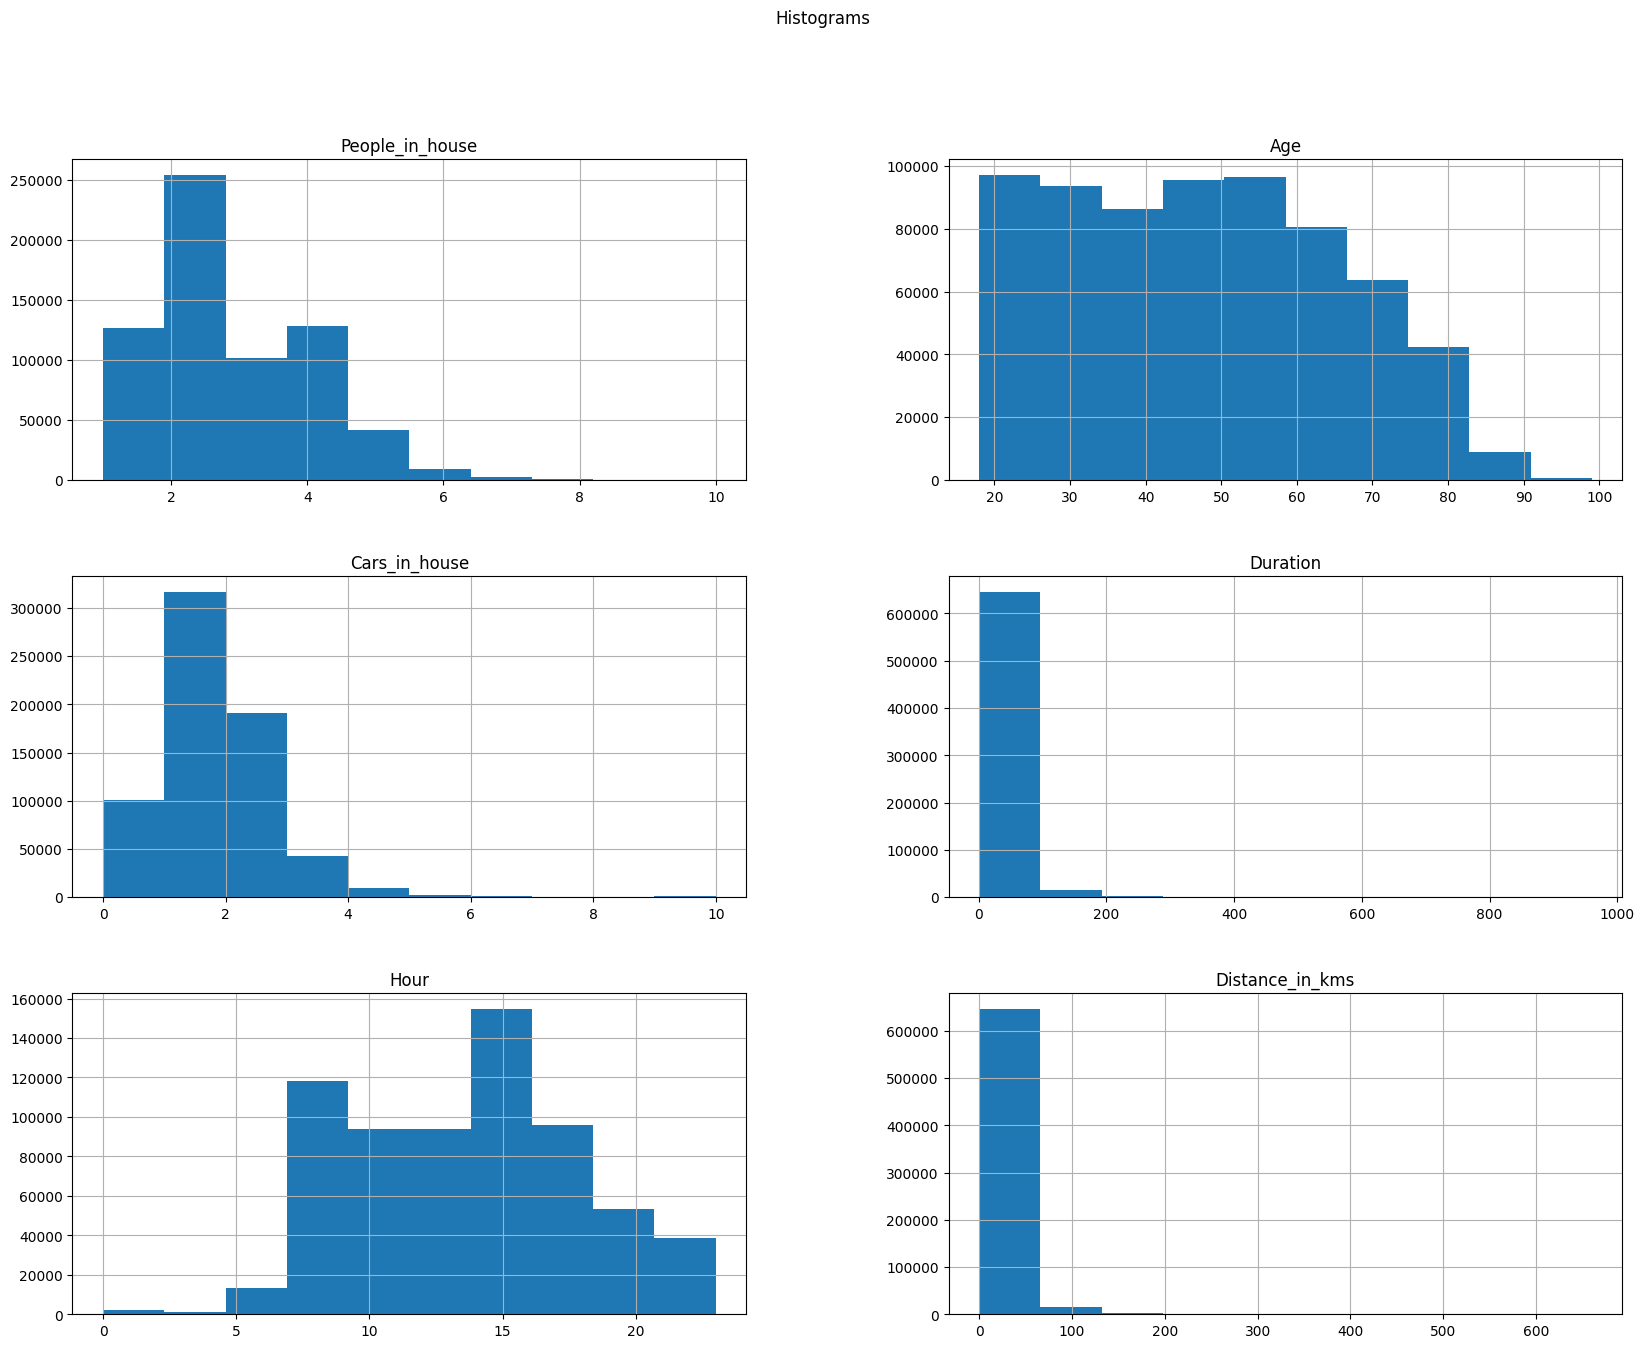

In [213]:
df.hist(bins=10, figsize=(20, 15))
plt.suptitle('Histograms') 
plt.show()

Removing low frequencies and reducing the distance-duration

In [214]:
df = df[(df['Duration'] <= 200)]

In [215]:
df = df[(df['Distance_in_kms'] <= 150)]

In [216]:
df = df[(df['Cars_in_house'] <= 4)]

In [217]:
df = df[(df['People_in_house'] <= 6)]

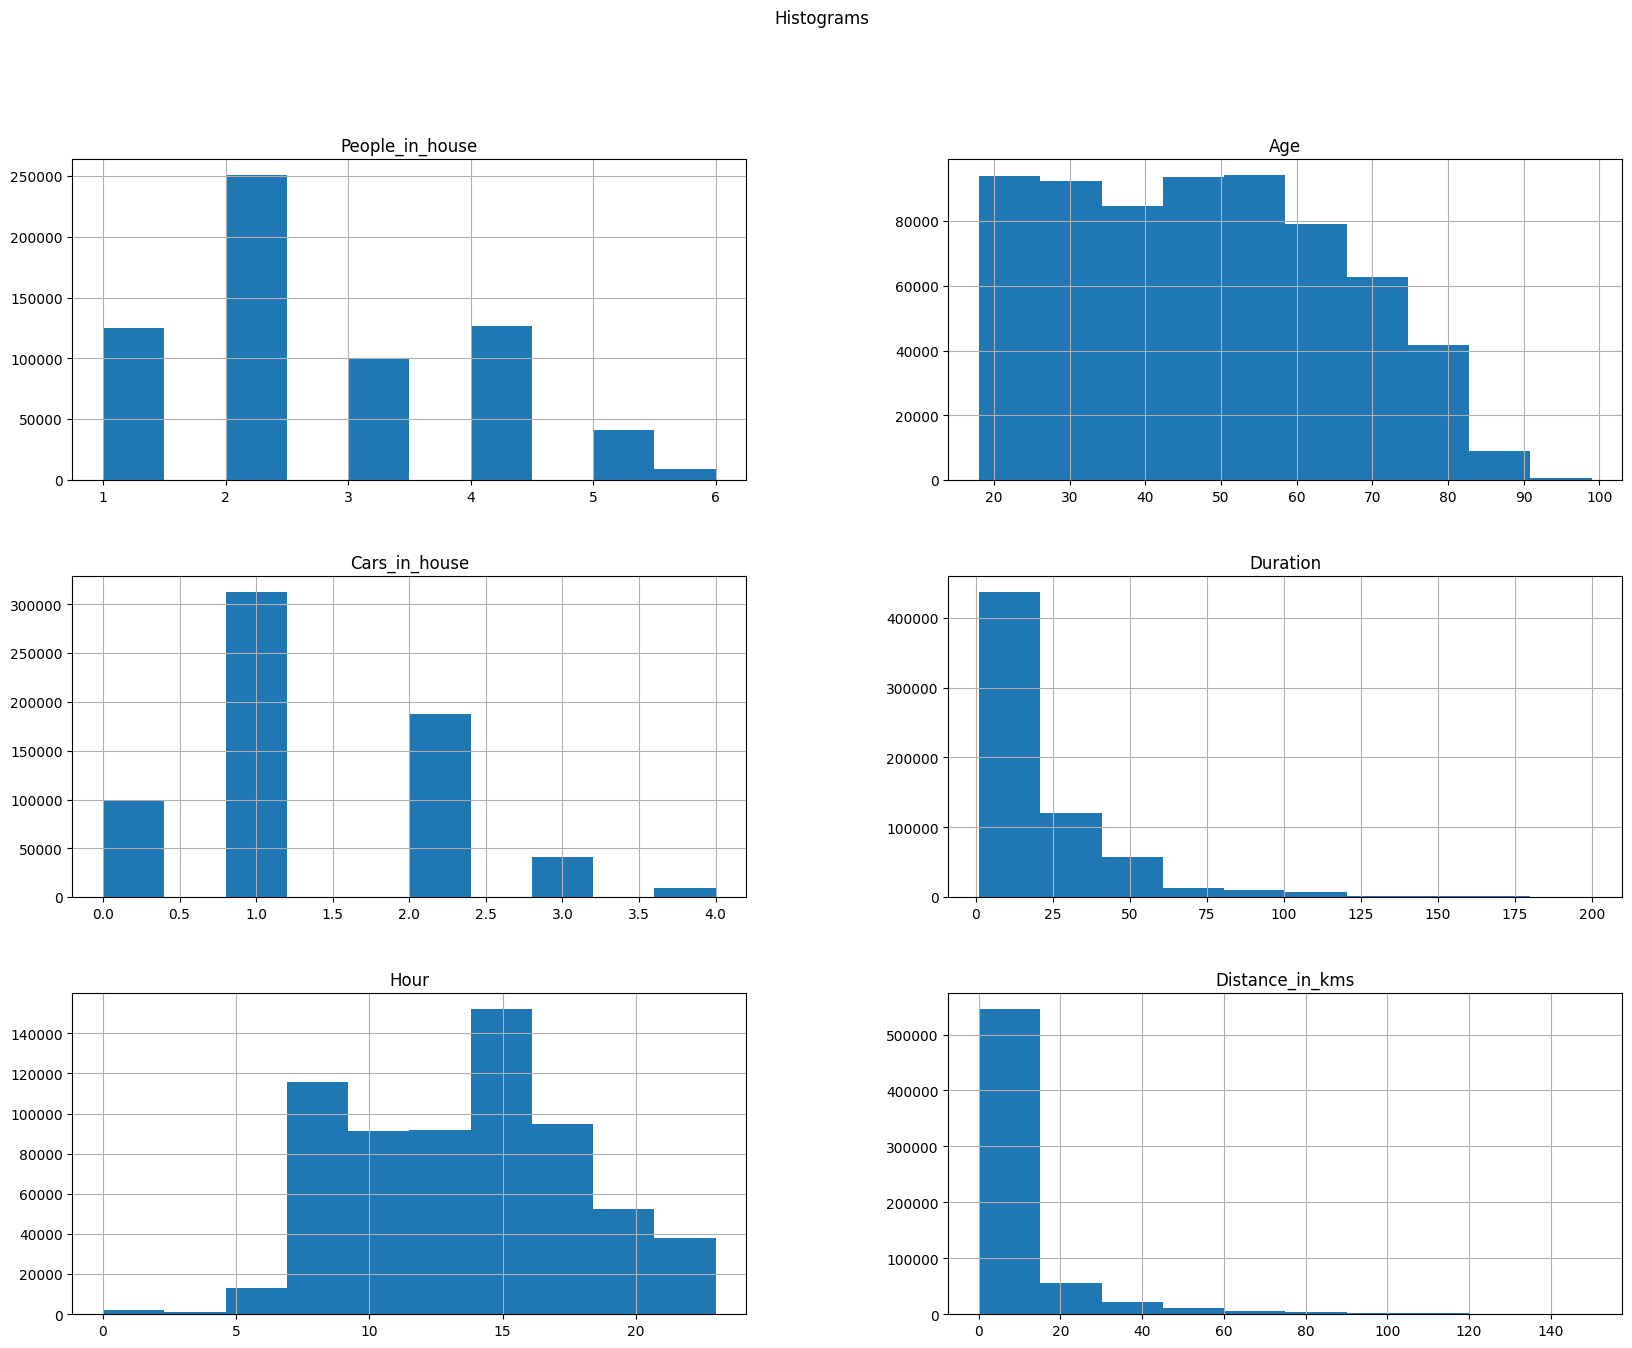

In [218]:
df.hist(bins=10, figsize=(20, 15))
plt.suptitle('Histograms') 
plt.show()

In [219]:
df.shape

(652048, 14)

In [220]:
df.describe()

,People_in_house,Age,Cars_in_house,Duration,Hour,Distance_in_kms
count,652048.000000,652048.000000,652048.000000,652048.000000,652048.000000,652048.000000
mean,2.591866,47.583347,1.307105,22.987473,13.645249,9.700505
std,1.246433,17.717519,0.857069,24.285613,4.298989,17.594358
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.100000
25%,2.000000,32.000000,1.000000,10.000000,10.000000,1.200000
50%,2.000000,47.000000,1.000000,15.000000,14.000000,3.200000
75%,4.000000,61.000000,2.000000,30.000000,17.000000,9.500000
max,6.000000,99.000000,4.000000,200.000000,23.000000,150.000000


# Explanatory Data Analysis

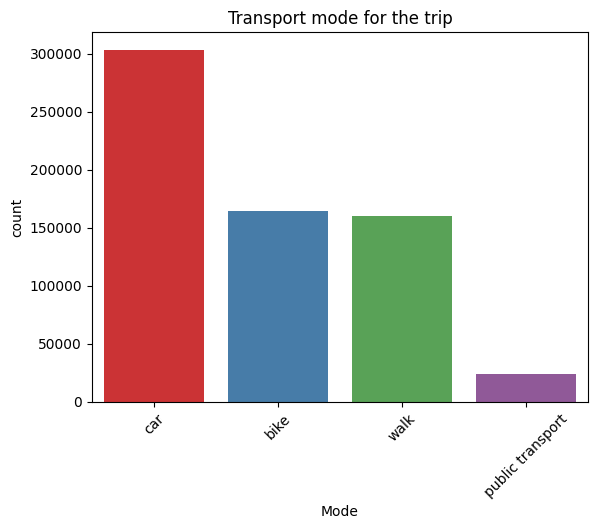

In [221]:
sns.countplot(x='Mode', data=df, palette='Set1')
plt.xticks(rotation=45)
plt.title('Transport mode for the trip')
plt.show()

In [222]:
perc=df['Mode'].value_counts(True)*100
print(perc)

Mode
car                 46.527403
bike                25.180968
walk                24.589754
public transport     3.701875
Name: proportion, dtype: float64


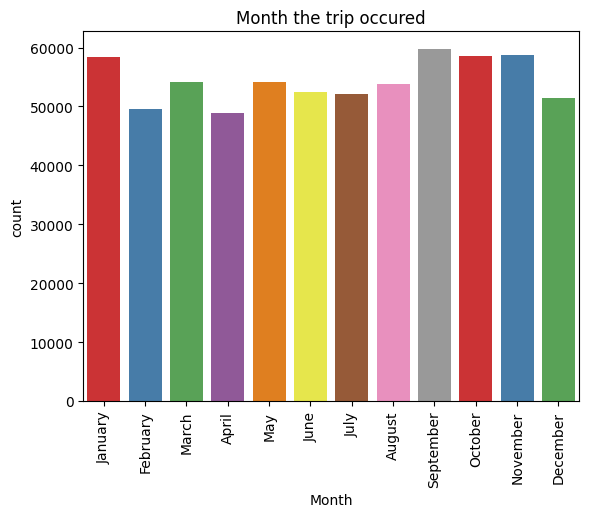

In [223]:
sns.countplot(x='Month', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.title('Month the trip occured')
plt.show()

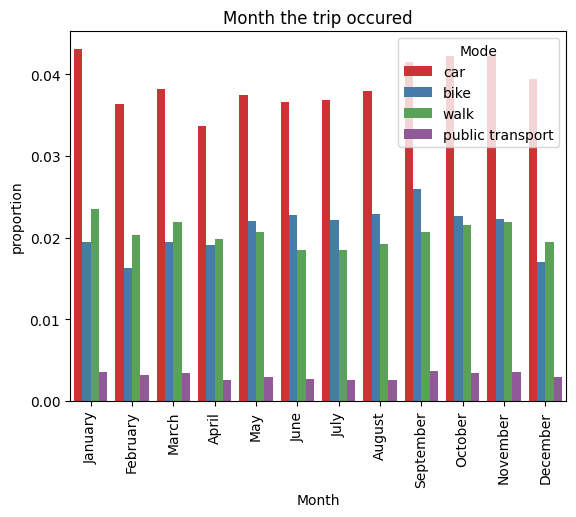

In [224]:
sns.countplot(x='Month', data=df, palette='Set1', hue='Mode', stat='proportion')
plt.xticks(rotation=90)
plt.title('Month the trip occured')
plt.show()

In [225]:
perc=df['Month'].value_counts(True)*100
print(perc)

Month
September    9.164816
November     8.999031
October      8.976640
January      8.957009
March        8.310124
May          8.298009
August       8.249239
June         8.051401
July         7.991896
December     7.882702
February     7.613703
April        7.505429
Name: proportion, dtype: float64


In [226]:
order_day = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

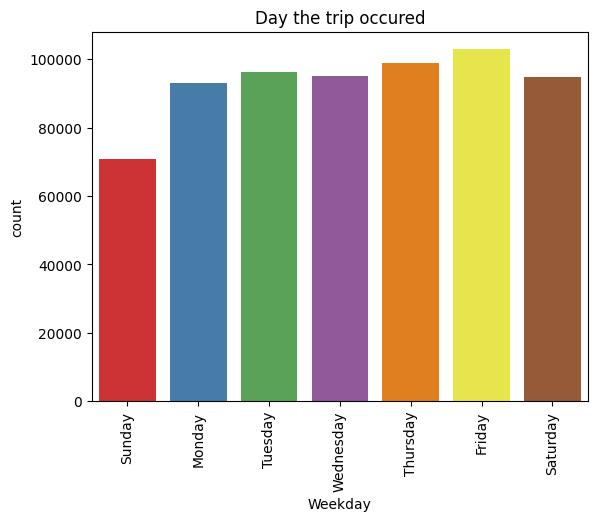

In [227]:
sns.countplot(x='Weekday', data=df, palette='Set1', order=order_day)
plt.xticks(rotation=90)
plt.title('Day the trip occured')
plt.show()

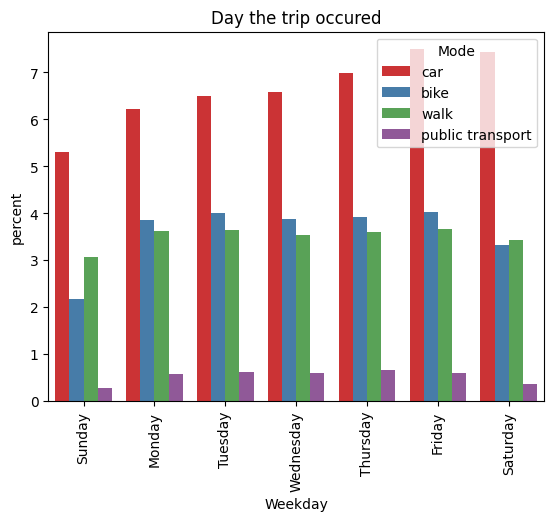

In [228]:
sns.countplot(x='Weekday', data=df, palette='Set1', hue='Mode', stat='percent', order=order_day)
plt.xticks(rotation=90)
plt.title('Day the trip occured')
plt.show()

In [229]:
perc=df['Weekday'].value_counts(True)*100
print(perc)

Weekday
Friday       15.786261
Thursday     15.154406
Tuesday      14.774526
Wednesday    14.591717
Saturday     14.557977
Monday       14.282998
Sunday       10.852115
Name: proportion, dtype: float64


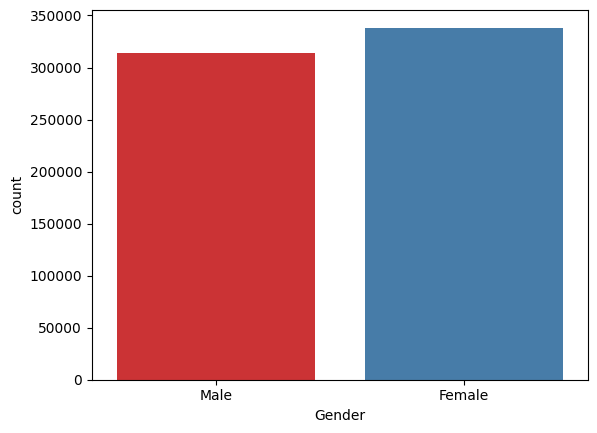

In [230]:
sns.countplot(x='Gender', data=df, palette='Set1')
plt.show()

In [231]:
perc=df['Gender'].value_counts(True)*100
print(perc)

Gender
Female    51.873635
Male      48.126365
Name: proportion, dtype: float64


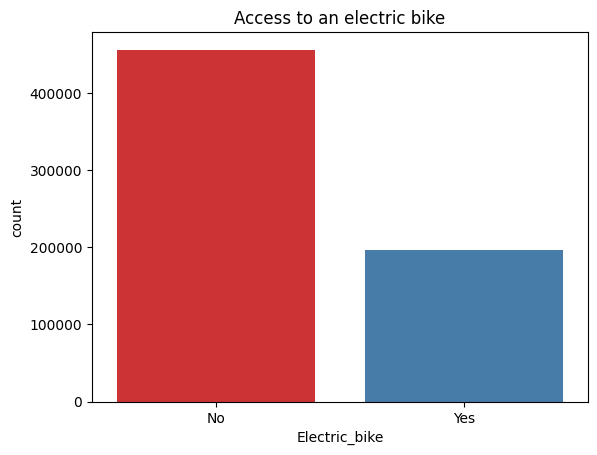

In [232]:
sns.countplot(x='Electric_bike', data=df, palette='Set1')
plt.title('Access to an electric bike')
plt.show()

In [233]:
perc=df['Electric_bike'].value_counts(True)*100
print(perc)

Electric_bike
No     69.909884
Yes    30.090116
Name: proportion, dtype: float64


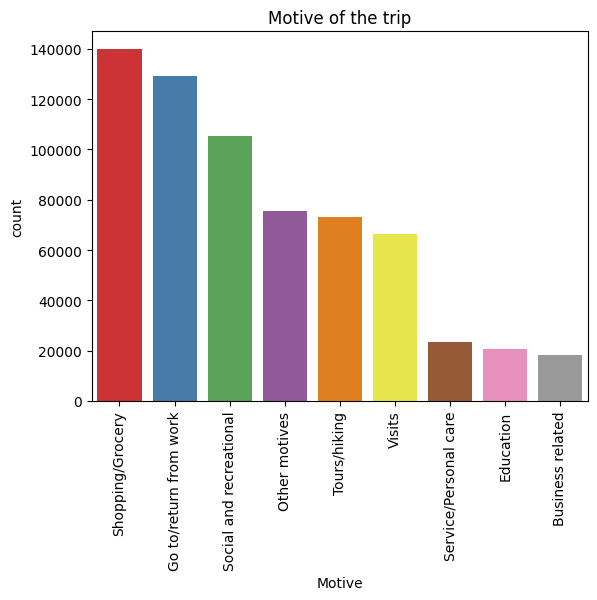

In [234]:
ordered_categories = df['Motive'].value_counts().index
sns.countplot(x='Motive', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Motive of the trip')
plt.show()

In [235]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery           21.465138
Go to/return from work     19.820780
Social and recreational    16.134242
Other motives              11.604207
Tours/hiking               11.241197
Visits                     10.176398
Service/Personal care       3.569522
Education                   3.170779
Business related            2.817737
Name: proportion, dtype: float64


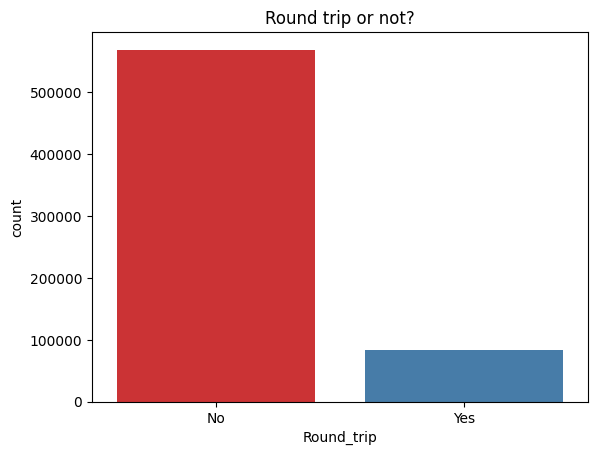

In [236]:
sns.countplot(x='Round_trip', data=df, palette='Set1')
plt.title('Round trip or not?')
plt.show()

In [237]:
perc=df['Round_trip'].value_counts(True)*100
print(perc)

Round_trip
No     87.219959
Yes    12.780041
Name: proportion, dtype: float64


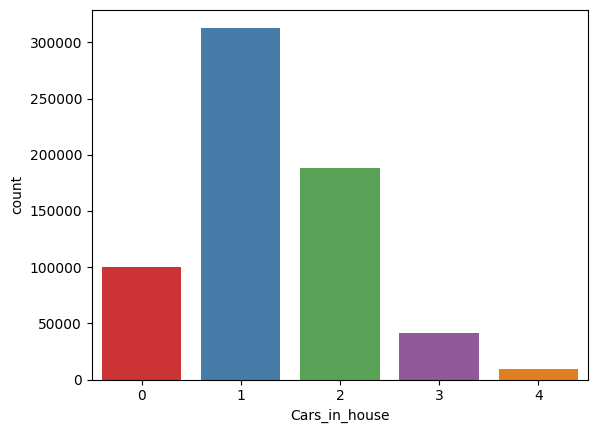

In [238]:
sns.countplot(x='Cars_in_house', data=df, palette='Set1')
plt.show()

In [239]:
perc=df['Cars_in_house'].value_counts(True)*100
print(perc)

Cars_in_house
1    48.019011
2    28.851557
0    15.293199
3     6.356587
4     1.479646
Name: proportion, dtype: float64


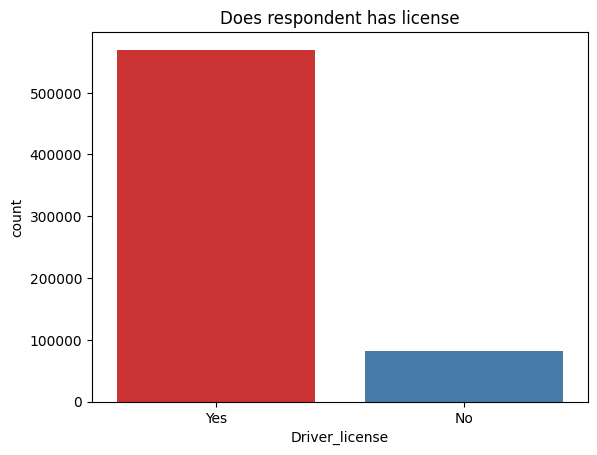

In [240]:
sns.countplot(x='Driver_license', data=df, palette='Set1')
plt.title('Does respondent has license')
plt.show()

In [241]:
perc=df['Driver_license'].value_counts(True)*100
print(perc)

Driver_license
Yes    87.378076
No     12.621924
Name: proportion, dtype: float64


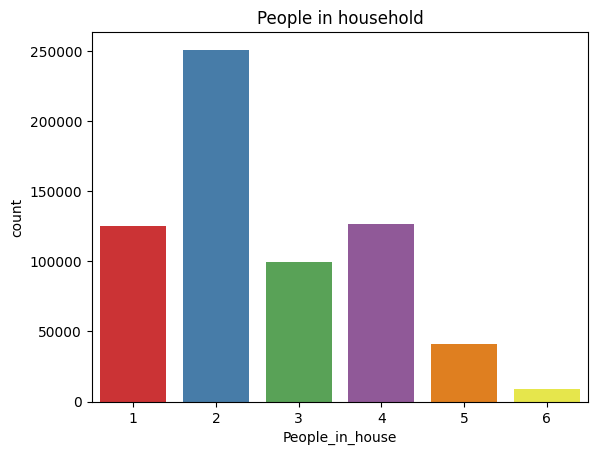

In [242]:
sns.countplot(x='People_in_house', data=df, palette='Set1')
plt.title('People in household')
plt.show()

In [243]:
perc=df['People_in_house'].value_counts(True)*100
print(perc)

People_in_house
2    38.499313
4    19.378328
1    19.172822
3    15.313136
5     6.255981
6     1.380420
Name: proportion, dtype: float64


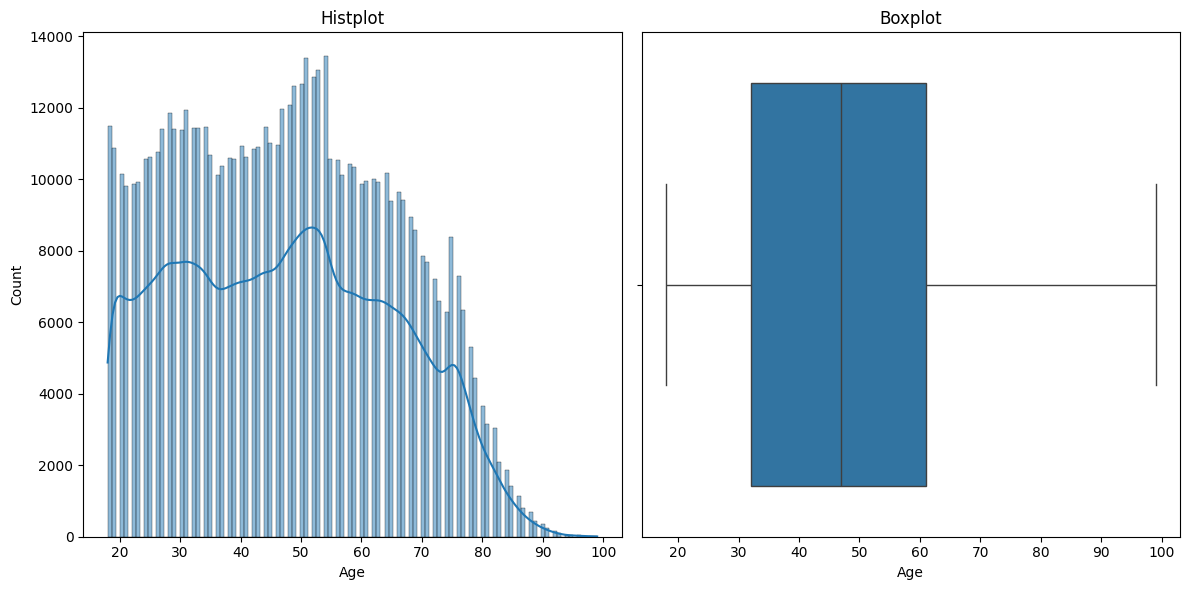

In [244]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Age', kde=True, ax=axes[0])
axes[0].set_title('Histplot')

sns.boxplot(x='Age', data=df, ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

plt.show()

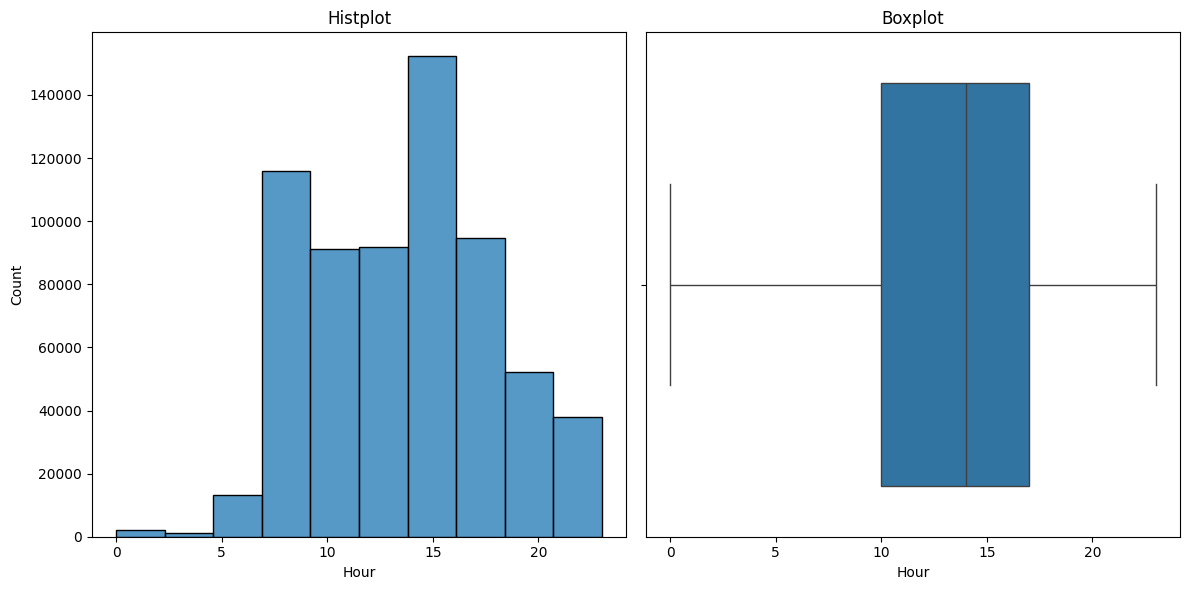

In [245]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.histplot(data=df, x='Hour', ax=axes[0], bins=10)
axes[0].set_title('Histplot')

sns.boxplot(x='Hour', data=df, ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

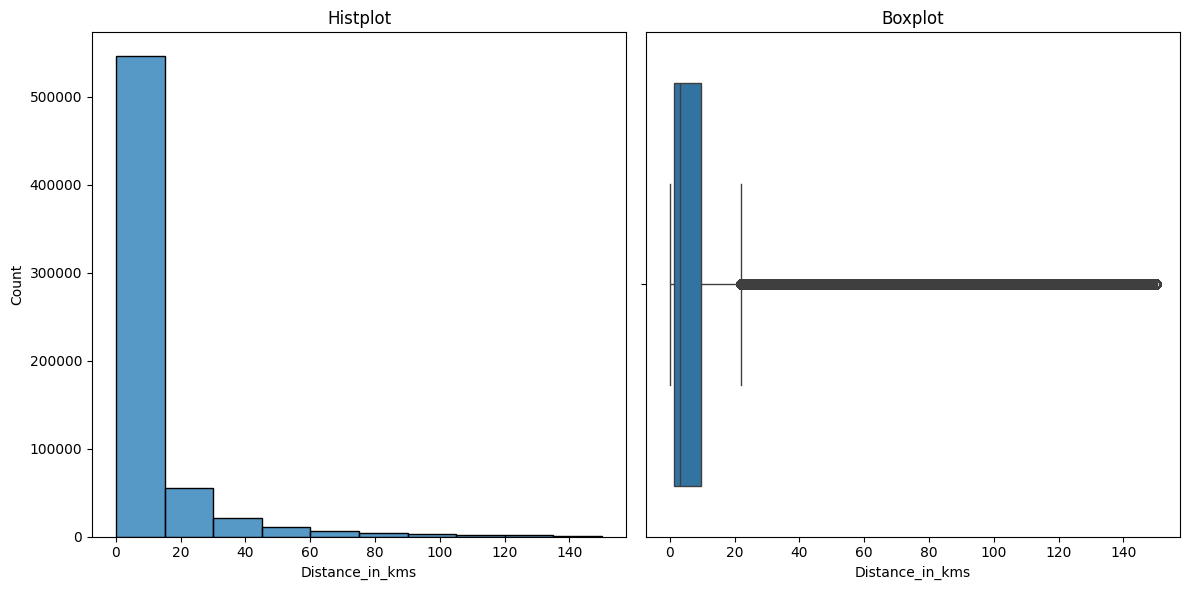

In [246]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.histplot(data=df, x='Distance_in_kms', ax=axes[0], bins=10)
axes[0].set_title('Histplot')

sns.boxplot(x='Distance_in_kms', data=df, ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

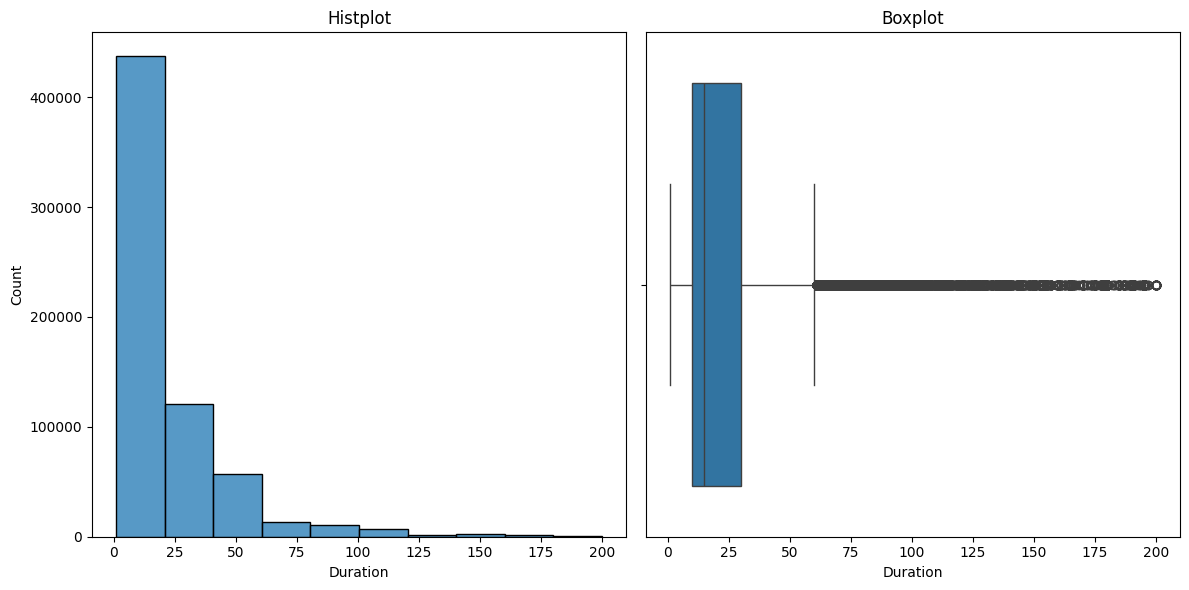

In [247]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Duration', ax=axes[0], bins=10)
axes[0].set_title('Histplot')

sns.boxplot(x='Duration', data=df, ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

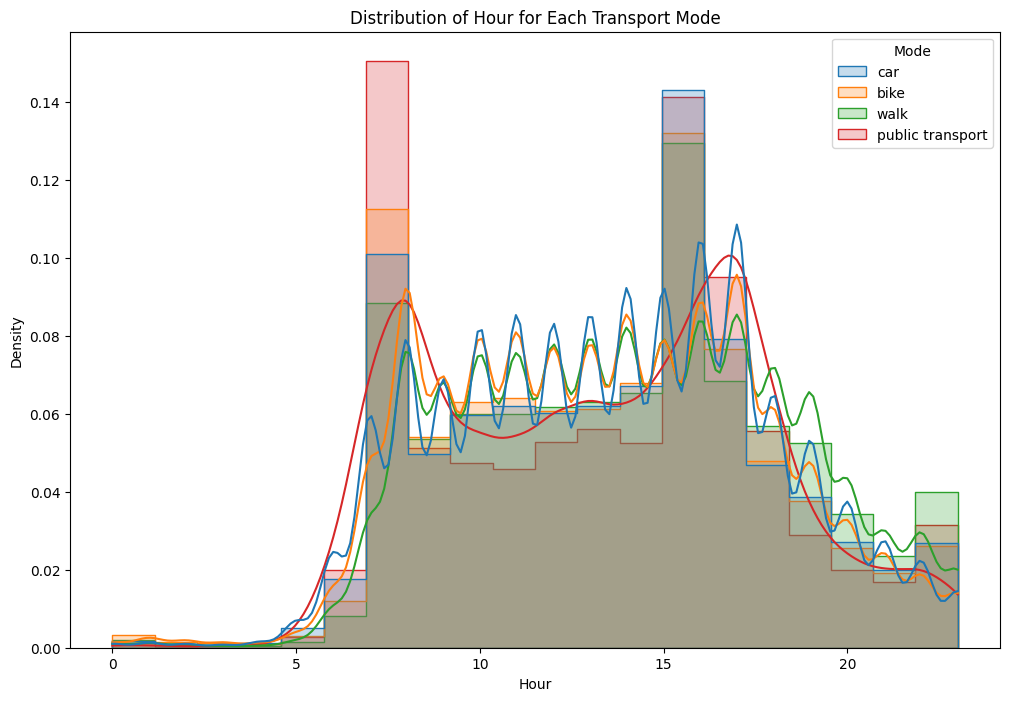

In [248]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Hour', hue='Mode', bins=20, kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribution of Hour for Each Transport Mode')
plt.xlabel('Hour')
plt.ylabel('Density')
plt.show()

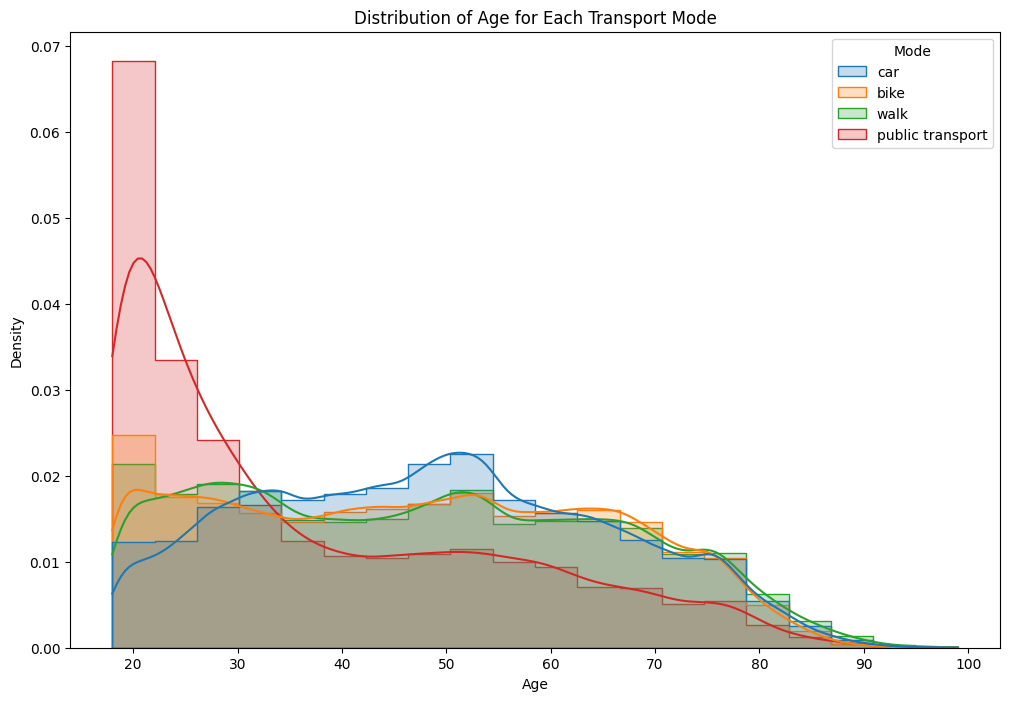

In [249]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Age', hue='Mode', bins=20, kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribution of Age for Each Transport Mode')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

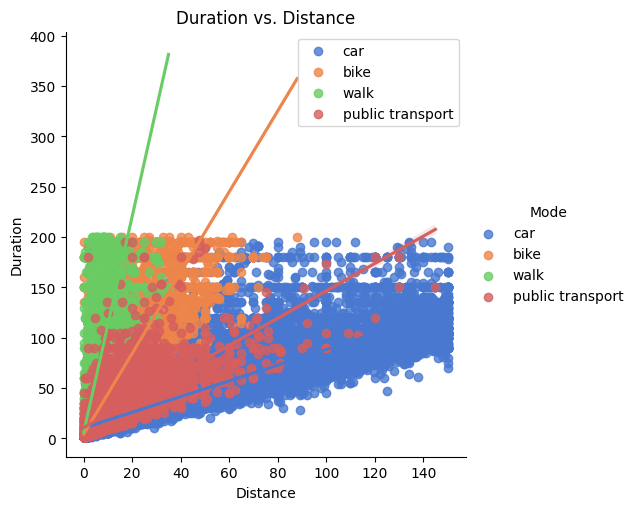

In [250]:
sns.lmplot(data=df, x='Distance_in_kms', y='Duration', hue='Mode', palette='muted')
plt.xlabel('Distance')
plt.ylabel('Duration')
plt.title('Duration vs. Distance')
plt.legend()
plt.show()

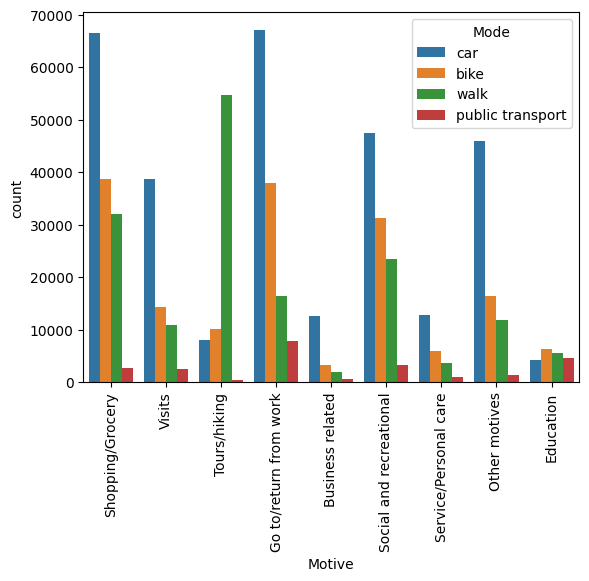

In [251]:
sns.countplot(x='Motive', data=df, hue="Mode")
plt.xticks(rotation=90)
plt.show()

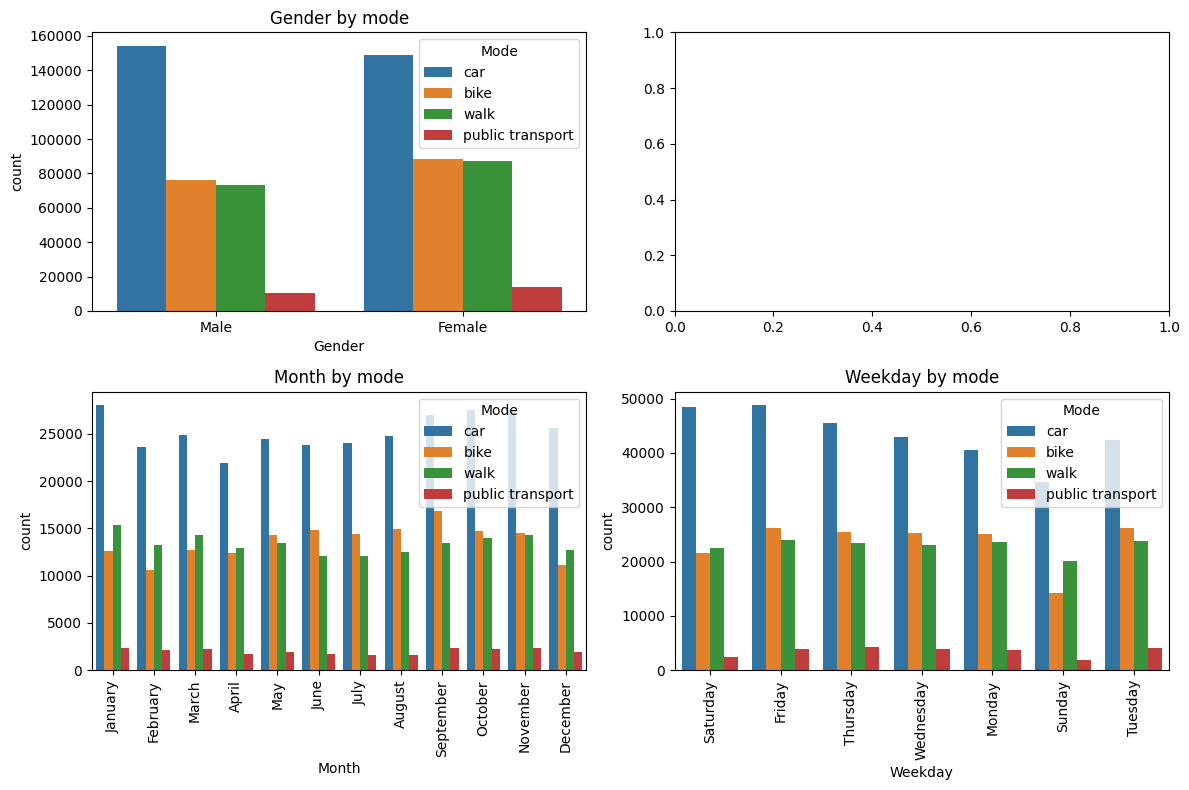

In [252]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

countplots = [
    (sns.countplot(x='Gender', data=df, hue="Mode", ax=axes[0, 0]), 'Gender by mode'),
    (sns.countplot(x='Month', data=df, hue="Mode", ax=axes[1, 0]), 'Month by mode'),
    (sns.countplot(x='Weekday', data=df, hue="Mode", ax=axes[1, 1]), 'Weekday by mode')
]

for plot, title in countplots:
    plot.set_title(title)
    if title in ['Month by mode', 'Weekday by mode']:
        plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.tight_layout()

plt.show()

# DATA PREPROCESS

In [253]:
df1 = df.copy()

In [254]:
df1

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Electric_bike,Month,Weekday,Round_trip,Motive,Duration,Hour,Mode,Distance_in_kms
0,1,Male,42,Yes,1,No,January,Saturday,No,Shopping/Grocery,15,10,car,6.0
1,1,Male,42,Yes,1,No,January,Saturday,No,Shopping/Grocery,10,11,car,6.0
2,1,Male,42,Yes,1,No,January,Saturday,No,Visits,5,15,bike,1.0
3,1,Male,42,Yes,1,No,January,Saturday,No,Visits,5,18,bike,1.0
4,2,Male,42,Yes,1,No,January,Friday,No,Shopping/Grocery,10,9,car,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Female,49,Yes,1,No,December,Thursday,No,Education,35,15,car,11.0
817122,3,Female,49,Yes,1,No,December,Thursday,No,Shopping/Grocery,7,16,walk,1.1
817123,3,Female,49,Yes,1,No,December,Thursday,No,Shopping/Grocery,5,17,walk,0.6
817124,3,Female,49,Yes,1,No,December,Thursday,No,Social and recreational,15,18,car,6.3


In [255]:
df1.columns

Index(['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Electric_bike', 'Month', 'Weekday', 'Round_trip', 'Motive', 'Duration',
       'Hour', 'Mode', 'Distance_in_kms'],
      dtype='object')

In [256]:
le=LabelEncoder()
features=['Gender',
       'Driver_license', 'Electric_bike',
       'Month', 'Weekday', 'Round_trip', 'Motive', 'Mode']
for col in features:
    df1[col]=le.fit_transform(df1[col])

<Axes: >

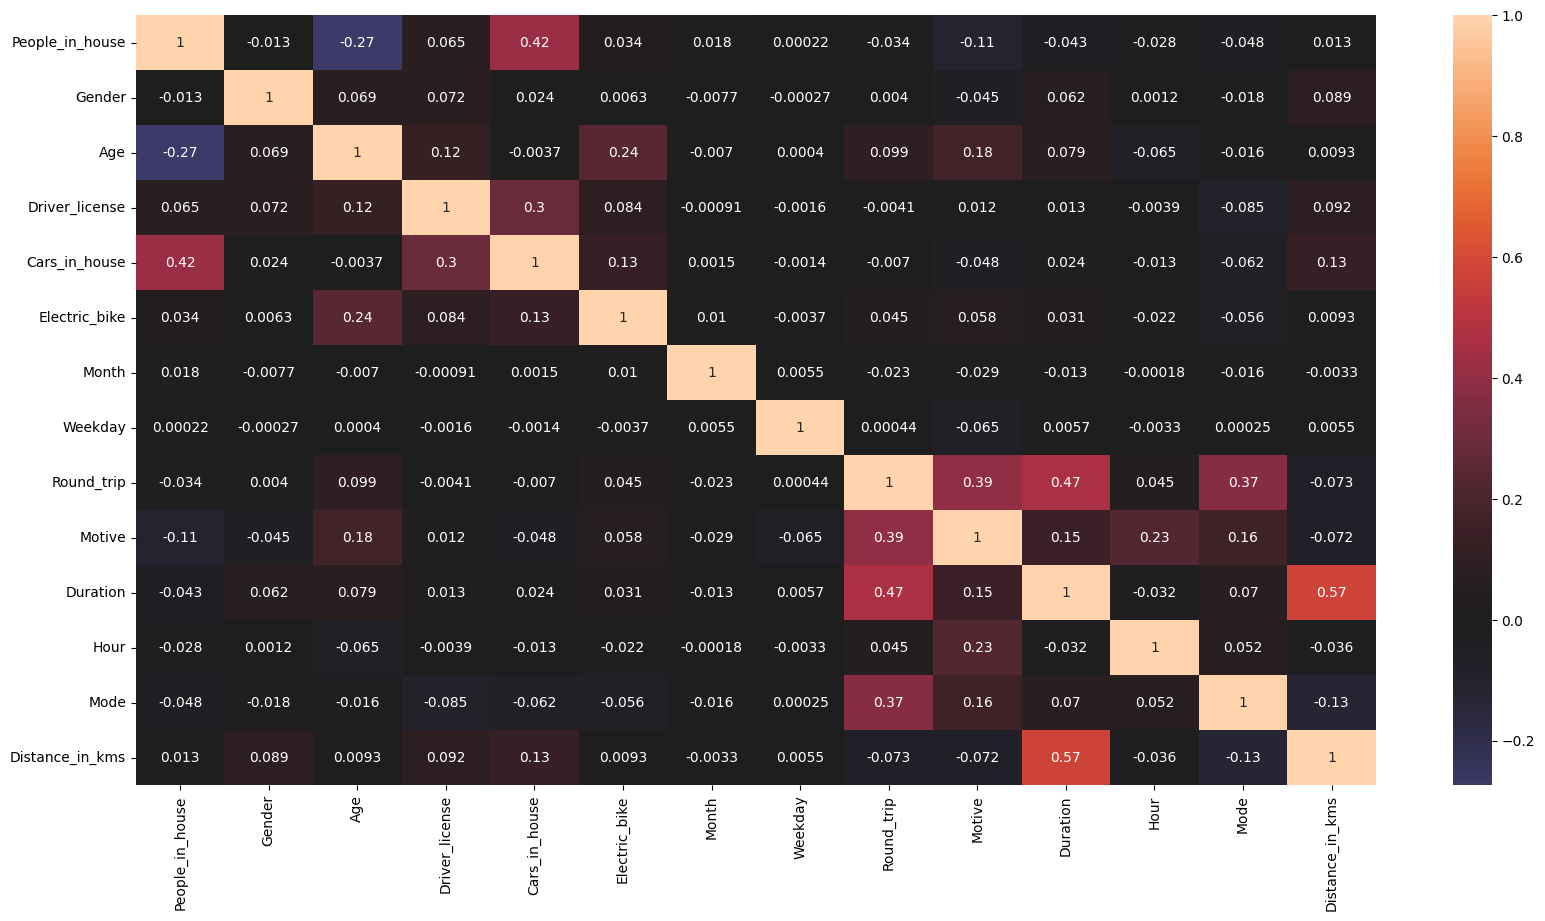

In [257]:
corrMatrix = df1.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [258]:
df.describe()

,People_in_house,Age,Cars_in_house,Duration,Hour,Distance_in_kms
count,652048.000000,652048.000000,652048.000000,652048.000000,652048.000000,652048.000000
mean,2.591866,47.583347,1.307105,22.987473,13.645249,9.700505
std,1.246433,17.717519,0.857069,24.285613,4.298989,17.594358
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.100000
25%,2.000000,32.000000,1.000000,10.000000,10.000000,1.200000
50%,2.000000,47.000000,1.000000,15.000000,14.000000,3.200000
75%,4.000000,61.000000,2.000000,30.000000,17.000000,9.500000
max,6.000000,99.000000,4.000000,200.000000,23.000000,150.000000


In [259]:
df.head(5)

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Electric_bike,Month,Weekday,Round_trip,Motive,Duration,Hour,Mode,Distance_in_kms
0,1,Male,42,Yes,1,No,January,Saturday,No,Shopping/Grocery,15,10,car,6.0
1,1,Male,42,Yes,1,No,January,Saturday,No,Shopping/Grocery,10,11,car,6.0
2,1,Male,42,Yes,1,No,January,Saturday,No,Visits,5,15,bike,1.0
3,1,Male,42,Yes,1,No,January,Saturday,No,Visits,5,18,bike,1.0
4,2,Male,42,Yes,1,No,January,Friday,No,Shopping/Grocery,10,9,car,3.0


In [260]:
drops = ["Mode"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state =42, stratify=y)

# Train set

In [271]:
X_train.head(10)

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Electric_bike,Month,Weekday,Round_trip,Motive,Duration,Hour,Distance_in_kms
512507,1,Female,53,Yes,1,No,April,Monday,Yes,Tours/hiking,10,22,0.7
351065,4,Female,31,Yes,2,No,February,Friday,No,Visits,5,20,1.8
44783,1,Female,34,Yes,0,No,March,Wednesday,No,Social and recreational,15,21,3.0
143094,2,Male,75,Yes,1,No,October,Friday,No,Shopping/Grocery,15,9,5.0
489407,3,Male,48,Yes,3,No,January,Tuesday,Yes,Social and recreational,138,14,26.1
704869,1,Male,53,Yes,1,No,September,Tuesday,Yes,Tours/hiking,83,19,13.0
813550,2,Female,56,Yes,2,Yes,February,Thursday,No,Go to/return from work,10,16,3.0
409182,4,Male,51,Yes,2,No,August,Tuesday,No,Shopping/Grocery,12,13,3.0
96696,2,Female,26,No,0,No,July,Wednesday,No,Visits,35,22,7.8
499507,3,Female,34,No,1,No,February,Tuesday,No,Other motives,30,8,15.8


In [272]:
value_mapping = {"Male":0, "Female":1}
X_train['Gender'] = X_train['Gender'].replace(value_mapping)

In [274]:
value_mapping = {"No":0, "Yes":1}
X_train['Driver_license'] = X_train['Driver_license'].replace(value_mapping)

In [275]:
value_mapping = {"No":0, "Yes":1}
X_train['Electric_bike'] = X_train['Electric_bike'].replace(value_mapping)

In [276]:
value_mapping = {"No":0, "Yes":1}
X_train['Round_trip'] = X_train['Round_trip'].replace(value_mapping)

In [277]:
value_mapping = {"Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Friday":5, "Saturday":6, "Sunday":7}
X_train['Weekday'] = X_train['Weekday'].replace(value_mapping)

In [278]:
value_mapping = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}
X_train['Month'] = X_train['Month'].replace(value_mapping)

In [280]:
y_train

512507    walk
351065     car
44783     bike
143094     car
489407    bike
          ... 
368921    bike
792785     car
500664     car
82828      car
233953    bike
Name: Mode, Length: 586843, dtype: object

In [281]:
value_mapping = {"car":0, "bike":1, "walk":2, "public transport":3}
y_train = y_train.replace(value_mapping)
y_train

512507    2
351065    0
44783     1
143094    0
489407    1
         ..
368921    1
792785    0
500664    0
82828     0
233953    1
Name: Mode, Length: 586843, dtype: int64

In [288]:
one_hot_encoded = pd.get_dummies(X_train[['Motive']])

one_hot_encoded = one_hot_encoded.astype(int)

X_train = pd.concat([X_train, one_hot_encoded], axis=1)

In [289]:
X_train['Hour'] = X_train['Hour'].astype('category')
hour_dummies = pd.get_dummies(X_train['Hour'], prefix='Hour').astype(int)
X_train = pd.concat([X_train, hour_dummies], axis=1)

In [291]:
drops = ['Motive', 'Hour']
X_train = X_train.drop(drops, axis=1)
X_train.head(5)

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Electric_bike,Month,Weekday,Round_trip,Duration,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
512507,1,1,53,1,1,0,4,1,1,10,...,0,0,0,0,0,0,0,0,1,0
351065,4,1,31,1,2,0,2,5,0,5,...,0,0,0,0,0,0,1,0,0,0
44783,1,1,34,1,0,0,3,3,0,15,...,0,0,0,0,0,0,0,1,0,0
143094,2,0,75,1,1,0,10,5,0,15,...,0,0,0,0,0,0,0,0,0,0
489407,3,0,48,1,3,0,1,2,1,138,...,1,0,0,0,0,0,0,0,0,0


# Test set

In [293]:
value_mapping = {"Male":0, "Female":1}
X_test['Gender'] = X_test['Gender'].replace(value_mapping)

In [294]:
value_mapping = {"No":0, "Yes":1}
X_test['Driver_license'] = X_test['Driver_license'].replace(value_mapping)

In [295]:
value_mapping = {"No":0, "Yes":1}
X_test['Electric_bike'] = X_test['Electric_bike'].replace(value_mapping)

In [296]:
value_mapping = {"No":0, "Yes":1}
X_test['Round_trip'] = X_test['Round_trip'].replace(value_mapping)

In [297]:
value_mapping = {"Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Friday":5, "Saturday":6, "Sunday":7}
X_test['Weekday'] = X_test['Weekday'].replace(value_mapping)

In [298]:
value_mapping = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}
X_test['Month'] = X_test['Month'].replace(value_mapping)

In [299]:
value_mapping = {"car":0, "bike":1, "walk":2, "public transport":3}
y_test = y_test.replace(value_mapping)
y_test.head(5)

687917    0
294619    0
536022    0
472586    2
380521    2
Name: Mode, dtype: int64

In [300]:
one_hot_encoded = pd.get_dummies(X_test[['Motive']])

one_hot_encoded = one_hot_encoded.astype(int)

X_test = pd.concat([X_test, one_hot_encoded], axis=1)

In [301]:
X_test['Hour'] = X_test['Hour'].astype('category')
hour_dummies = pd.get_dummies(X_test['Hour'], prefix='Hour').astype(int)
X_test = pd.concat([X_test, hour_dummies], axis=1)

In [302]:
drops = ['Motive', 'Hour']
X_test = X_test.drop(drops, axis=1)
X_test.head(5)

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Electric_bike,Month,Weekday,Round_trip,Duration,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
687917,3,1,34,1,2,0,10,3,0,10,...,0,0,0,1,0,0,0,0,0,0
294619,2,1,84,0,1,0,10,6,0,45,...,0,0,0,0,0,0,0,0,1,0
536022,2,0,48,1,2,0,7,6,0,25,...,0,1,0,0,0,0,0,0,0,0
472586,1,1,63,1,0,0,1,7,1,45,...,0,0,1,0,0,0,0,0,0,0
380521,2,0,58,1,2,0,5,4,1,30,...,0,0,0,0,0,0,0,0,0,0


In [303]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((586843, 44), (65205, 44), (586843,), (65205,))

In [306]:
X_train.isnull().any()

People_in_house                   False
Gender                            False
Age                               False
Driver_license                    False
Cars_in_house                     False
Electric_bike                     False
Month                             False
Weekday                           False
Round_trip                        False
Duration                          False
Distance_in_kms                   False
Motive_Business related           False
Motive_Education                  False
Motive_Go to/return from work     False
Motive_Other motives              False
Motive_Service/Personal care      False
Motive_Shopping/Grocery           False
Motive_Social and recreational    False
Motive_Tours/hiking               False
Motive_Visits                     False
Hour_0                            False
Hour_1                            False
Hour_2                            False
Hour_3                            False
Hour_4                            False


In [307]:
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

In [308]:
train_set.shape, test_set.shape

((586843, 45), (65205, 45))

In [310]:
train_set.to_csv('train_set.csv', index=False)
test_set.to_csv('test_set.csv', index=False)
with zipfile.ZipFile('data.zip', 'w') as zipf:
    zipf.write('train_set.csv')
    zipf.write('test_set.csv')

In [311]:
import os
os.remove('train_set.csv')
os.remove('test_set.csv')